In [ ]:
#!pip install wordcloud

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
data=pd.read_csv('./data/topified_vectorized_Science1900_2023.csv')
data.head()

,Unnamed: 0,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,publicationDate,title_abstract,topic_code,topic_list,x_vector,y_vector,z_vector
0,0,479c07e8f4537f6cc9cdf740f2037b63735a96ad,"{'MAG': '2066851951', 'DOI': '10.1001/ARCHOTOL...","{'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...",Acoustical characteristics of tinnitus. An ana...,The recognition of tinnitus aurium as a proble...,1962,5,69,1,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],1962-02-01,Acoustical characteristics tinnitus. analysis....,20,20_hearing_ear_auditory_hearing loss,2.364143,5.038495,3.597319
1,1,157afb079051ca47b710f7cdaebfde3e2294e5ca,"{'MAG': '2469680164', 'DOI': '10.2527/JAS1971....","{'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...",Reproductive steroids in the bovine. VI. Chang...,Summary Urine and blood samples were collected...,1971,23,51,0,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],1971-07-01,Reproductive steroids bovine. VI. Changes inte...,26,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812
2,2,5774d000143759165e760ba52e64e83e6883a525,"{'MAG': '2511119900', 'DOI': '10.5153/sro.4071...",NaN,Holiday Rentals: The New Gentrification Battle...,"In this paper, I explore the impacts of holida...",2016,24,262,24,['Business'],"[{'category': 'Business', 'source': 'external'...",['JournalArticle'],2016-08-01,Holiday Rentals: New Gentrification Battlefron...,-1,-1_patients_study_results_disease,6.278863,7.608128,5.960701
3,3,d8d6d6eaab5966762ac5c6b3a87f683bfd17474f,"{'MAG': '2061837047', 'DOI': '10.1016/S0024-49...",NaN,Aluminium saturation in I- and S-type granites...,NaN,1999,26,1015,139,['Geology'],"[{'category': 'Geology', 'source': 'external'}...",NaN,1999-03-01,Aluminium saturation I- S-type granites charac...,0,0_species_soil_plant_plants,6.205470,3.753077,8.391185
4,4,2b0d90af12f959b29fed9afefe90f54b4e0324cd,"{'MAG': '2885121946', 'DOI': '10.25165/J.IJABE...",NaN,Research and development in agricultural robot...,Digital farming is the practice of modern tech...,2018,198,299,7,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...",['Review'],2018-08-08,Research development agricultural robotics: pe...,0,0_species_soil_plant_plants,4.762645,4.163726,8.538537


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53833 entries, 0 to 53832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                53833 non-null  int64  
 1   paperId                   53833 non-null  object 
 2   externalIds               53833 non-null  object 
 3   publicationVenue          30673 non-null  object 
 4   title                     53833 non-null  object 
 5   abstract                  38581 non-null  object 
 6   year                      53833 non-null  int64  
 7   referenceCount            53833 non-null  int64  
 8   citationCount             53833 non-null  int64  
 9   influentialCitationCount  53833 non-null  int64  
 10  fieldsOfStudy             52384 non-null  object 
 11  s2FieldsOfStudy           53833 non-null  object 
 12  publicationTypes          34229 non-null  object 
 13  publicationDate           46284 non-null  object 
 14  title_

In [11]:
# Data Overview
print("Data Overview:")
print(data.head())
print("\nData Types:")
print(data.dtypes)
print("\nMissing Values:")
print(data.isnull().sum())
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data[['year', 'citationCount']].describe())

Data Overview:
   Unnamed: 0                                   paperId   
0           0  479c07e8f4537f6cc9cdf740f2037b63735a96ad  \
1           1  157afb079051ca47b710f7cdaebfde3e2294e5ca   
2           2  5774d000143759165e760ba52e64e83e6883a525   
3           3  d8d6d6eaab5966762ac5c6b3a87f683bfd17474f   
4           4  2b0d90af12f959b29fed9afefe90f54b4e0324cd   

                                         externalIds   
0  {'MAG': '2066851951', 'DOI': '10.1001/ARCHOTOL...  \
1  {'MAG': '2469680164', 'DOI': '10.2527/JAS1971....   
2  {'MAG': '2511119900', 'DOI': '10.5153/sro.4071...   
3  {'MAG': '2061837047', 'DOI': '10.1016/S0024-49...   
4  {'MAG': '2885121946', 'DOI': '10.25165/J.IJABE...   

                                    publicationVenue   
0  {'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...  \
1  {'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...   
2                                                NaN   
3                                                NaN   
4            

In [12]:
# Count the number of words in the 'title' column
data['title_word_count'] = data['title'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate the length of the 'title' column
data['title_length'] = data['title'].apply(lambda x: len(str(x)))

# Count the number of words in the 'abstract' column
data['abstract_word_count'] = data['abstract'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate the length of the 'abstract' column
data['abstract_length'] = data['abstract'].apply(lambda x: len(str(x)))

# Display the first few rows of the modified DataFrame
print(data[['title', 'title_word_count', 'title_length', 'abstract_word_count', 'abstract_length']].head())


                                               title  title_word_count   
0  Acoustical characteristics of tinnitus. An ana...                 8  \
1  Reproductive steroids in the bovine. VI. Chang...                19   
2  Holiday Rentals: The New Gentrification Battle...                 7   
3  Aluminium saturation in I- and S-type granites...                13   
4  Research and development in agricultural robot...                13   

   title_length  abstract_word_count  abstract_length  
0            52                  159             1002  
1           104                  632             2999  
2            51                  234             1428  
3           101                    1                3  
4            84                  294             1754  


In [29]:
data = data.dropna()
data.drop(['Unnamed: 0','paperId','externalIds'], axis=1)

,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,...,topic_list,x_vector,y_vector,z_vector,title_word_count,title_length,abstract_word_count,abstract_length,title_tokens,abstract_tokens
0,"{'id': 'a3a6c306-5d4a-48fd-9054-2cd9277bf956',...",Acoustical characteristics of tinnitus. An ana...,The recognition of tinnitus aurium as a proble...,1962,5,69,1,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,20_hearing_ear_auditory_hearing loss,2.364143,5.038495,3.597319,8,6,159,150,"[acoustical, characteristics, tinnitus, analysis]","[recognition, tinnitus, aurium, problem, otolo..."
1,"{'id': 'bade12e5-f20e-4b51-83a6-534e3705569a',...",Reproductive steroids in the bovine. VI. Chang...,Summary Urine and blood samples were collected...,1971,23,51,0,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,26_hormone_estrogen_lh_pituitary,2.281632,3.871610,6.215812,19,16,632,478,"[reproductive, steroids, bovine, vi, changes, ...","[summary, urine, blood, samples, collected, ni..."
2,"{'id': 'fd4c7628-c16e-4b50-8555-3ac3ad6da2d7',...","Cortical Surface-Based Analysis II: Inflation,...",The surface of the human cerebral cortex is a ...,1999,65,5734,559,"['Mathematics', 'Medicine']","[{'category': 'Mathematics', 'source': 'extern...",['JournalArticle'],...,6_cortex_motor_memory_visual,2.925745,6.533843,4.116532,14,11,107,95,"[cortical, analysis, ii, inflation, flattening...","[surface, human, cerebral, cortex, highly, fol..."
3,"{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",Nonoperative dilatation of coronary-artery ste...,In percutaneous transluminal coronary angiopla...,1979,11,2422,38,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,31_md_ventricular_heart_facc,0.987944,6.179577,6.120787,11,9,203,183,"[nonoperative, dilatation, stenosis, percutane...","[percutaneous, transluminal, coronary, angiopl..."
4,"{'id': '5e31c5d5-eaf7-4832-aa9a-4565203cb02c',...",Reconstruction of the floor of the orbit by bo...,THE ORBITAL contour may be distorted by commin...,1950,9,75,0,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,84_eyelid_orbital_lid_levator,1.011518,4.734367,3.758004,11,10,165,151,"[reconstruction, floor, orbit, bone, grafts]","[orbital, contour, may, distorted, comminution..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19321,"{'id': 'e0a7f739-4012-4339-ad3e-65a6f144e31b',...",Fracture and Dislocation Classification Compen...,"From the *Department of Orthopaedic Surgery, M...",2007,42,1397,44,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,43_fractures_spinal_cervical_cord,1.720458,4.986771,4.262669,5,5,270,212,"[fracture, dislocation, classification]","[department, orthopaedic, surgery, mcgovern, m..."
19322,"{'id': 'dc31f077-7737-4e33-baa3-bceeff44ec27',...",A comparison of rate control and rhythm contro...,BACKGROUND\nMaintenance of sinus rhythm is the...,2002,16,1803,18,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['Study', 'JournalArticle', 'ClinicalTrial']",...,31_md_ventricular_heart_facc,1.222447,6.261564,6.164528,16,15,303,273,"[comparison, rate, control, rhythm, control, p...","[background, maintenance, sinus, rhythm, main,..."
19323,"{'id': '3456d2d7-a9b4-495f-a7a0-a238096ee07a',...",Type I IFNs enhance the terminal differentiati...,This study identifies type I IFNs as activatin...,1998,45,666,22,"['Medicine', 'Biology']","[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],...,21_cells_class_mhc_cell,-0.536561,3.366763,6.968517,11,10,286,243,"[type, ifns, enhance, terminal, differentiatio...","[identifies, type, ifns, activating, cytokines..."
19324,"{'id': '2132f348-fc4d-44c0-8717-e40a728868af',...",PROTOPLASTS AND L-TYPE GROWTH OF ESCHERICHIA COLI,"A preceding art

In [14]:
import pandas as pd

# Count NaN values in the entire DataFrame
nan_count = data.isna().sum().sum()

# Alternatively, count NaN values in each column separately
nan_count_per_column = data.isna().sum()

print("Total NaN values in the DataFrame:", nan_count)
print("NaN count per column:")
print(nan_count_per_column)


Total NaN values in the DataFrame: 0
NaN count per column:
Unnamed: 0                  0
paperId                     0
externalIds                 0
publicationVenue            0
title                       0
abstract                    0
year                        0
referenceCount              0
citationCount               0
influentialCitationCount    0
fieldsOfStudy               0
s2FieldsOfStudy             0
publicationTypes            0
publicationDate             0
title_abstract              0
topic_code                  0
topic_list                  0
x_vector                    0
y_vector                    0
z_vector                    0
title_word_count            0
title_length                0
abstract_word_count         0
abstract_length             0
dtype: int64


In [15]:
import pandas as pd

# Assuming 'data' is your DataFrame
zero = data.isnull().sum()
zero

Unnamed: 0                  0
paperId                     0
externalIds                 0
publicationVenue            0
title                       0
abstract                    0
year                        0
referenceCount              0
citationCount               0
influentialCitationCount    0
fieldsOfStudy               0
s2FieldsOfStudy             0
publicationTypes            0
publicationDate             0
title_abstract              0
topic_code                  0
topic_list                  0
x_vector                    0
y_vector                    0
z_vector                    0
title_word_count            0
title_length                0
abstract_word_count         0
abstract_length             0
dtype: int64

In [30]:
data.to_csv('clean_topified_vectorized_Science1900_2023.csv',index=False)


In [31]:
data=pd.read_csv('clean_topified_vectorized_Science1900_2023.csv')


In [32]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n","b","c","h","r",""}
stop_words.update(custom_stopwords)

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# Assuming you have a DataFrame 'data' with 'title' and 'abstract' columns
data['title_tokens'] = data['title'].apply(preprocess_text)
data['abstract_tokens'] = data['abstract'].apply(preprocess_text)

# Calculate the most frequent words in 'title' and 'abstract'
title_word_counts = Counter(word for words in data['title_tokens'] for word in words)
abstract_word_counts = Counter(word for words in data['abstract_tokens'] for word in words)

# Get the most common words (e.g., top 10)
top_title_words = title_word_counts.most_common(10)
top_abstract_words = abstract_word_counts.most_common(10)

# Display the most frequent words in 'title' and 'abstract'
print("Top words in 'title':")
for word, count in top_title_words:
    print(f"{word}: {count}")

print("\nTop words in 'abstract':")
for word, count in top_abstract_words:
    print(f"{word}: {count}")


Top words in 'title':
human: 975
coli: 961
escherichia: 821
cells: 765
disease: 636
patients: 625
cell: 625
clinical: 573
protein: 483
cancer: 464

Top words in 'abstract':
patients: 12733
cells: 9729
cell: 6261
may: 5708
coli: 5647
disease: 4927
data: 4263
treatment: 4086
human: 4080
protein: 4030


In [33]:
# top 100 abstact combined with the most common to 10 words

# the most common words (e.g., top 10)
top_title_words = [word for word, _ in title_word_counts.most_common(10)]
top_abstract_words = [word for word, _ in abstract_word_counts.most_common(10)]

# Filter rows that contain at least one of the top words in 'abstract'
filtered_data = data[data['abstract_tokens'].apply(lambda tokens: any(word in tokens for word in top_abstract_words))]

# Display the first 100 abstracts
first_100_abstracts = filtered_data['abstract'][:100]
for idx, abstract in enumerate(first_100_abstracts):
    print(f"Abstract {idx + 1}:\n{abstract}\n")

Abstract 1:
The recognition of tinnitus aurium as a problem in otological practice and in more recent years as a problem in audiological practice is widespread. Unfortunately, there has been little published research on this symptom. It may be hoped that the report by Reed 7 signaled the beginning of systematic investigations of nonvibratory tinnitus aurium. Clinical observations seem to indicate that studies of tinnitus by several medical and nonmedical specialties may be of value. Our training as audiologists dictated that our investigation focus on the acoustical characteristics of the symptom. Since there were no published studies of the various acoustical characteristics of tinnitus when the present investigation was undertaken, 2 primary goals were set. The first objective was to develop a basic methodology for use in the measurement of the acoustical characteristics of nonvibratory tinnitus aurium. The other primary goal was to determine whether or not group differences existed 

In [34]:


#  the top 100 words in the abstracts
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {"based","groups","years","without","use","may","cases","high","type","three","first","method","including","compared","new","among","less","reported","months","show","method","could","several","low","large","higher","reported","simialr","less","among","showed","among","different","type","first","three","high","however","normal","studies","activity","use","cases","two", "one", "results", "e", "study","also","found","used","p","results","group","using","n","b","c","h","r",""}
stop_words.update(custom_stopwords)
top_abstract_words = abstract_word_counts.most_common(100)

# Display the top 100 words in 'abstract'
print("Top 100 words in 'abstract':")
for word, count in top_abstract_words:
    print(f"{word}: {count}")

Top 100 words in 'abstract':
patients: 12733
cells: 9729
cell: 6261
may: 5708
coli: 5647
disease: 4927
data: 4263
treatment: 4086
human: 4080
protein: 4030
clinical: 3915
years: 3752
associated: 3735
use: 3595
cases: 3593
activity: 3588
studies: 3551
levels: 3533
increased: 3381
analysis: 3366
present: 3345
normal: 3256
methods: 3146
eyes: 3145
however: 3117
high: 3080
type: 3068
three: 3054
first: 2981
compared: 2921
time: 2920
expression: 2857
blood: 2843
different: 2838
risk: 2834
gene: 2829
new: 2818
age: 2800
effects: 2796
effect: 2788
system: 2748
observed: 2716
control: 2716
well: 2662
growth: 2603
cancer: 2582
rate: 2543
among: 2538
showed: 2520
within: 2513
significantly: 2500
significant: 2499
number: 2474
model: 2464
response: 2447
acid: 2431
factors: 2367
function: 2357
visual: 2350
changes: 2347
dna: 2309
less: 2285
similar: 2264
evidence: 2248
reported: 2224
tissue: 2180
development: 2176
tumor: 2159
many: 2133
higher: 2109
large: 2093
low: 2060
including: 2059
per: 2055


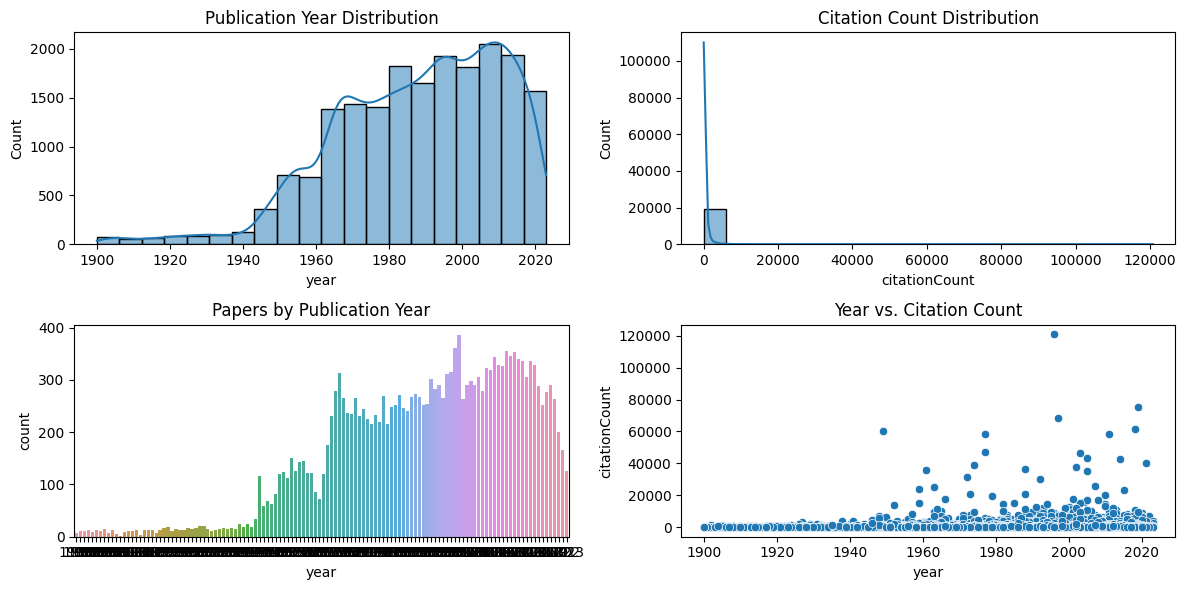

In [35]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='year', bins=20, kde=True)
plt.title('Publication Year Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=data, x='citationCount', bins=20, kde=True)
plt.title('Citation Count Distribution')

# Bar chart of papers by publication year
plt.subplot(2, 2, 3)
sns.countplot(data=data, x='year')
plt.title('Papers by Publication Year')

# Scatter plot of year vs. citationCount
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='year', y='citationCount')
plt.title('Year vs. Citation Count')

plt.tight_layout()
plt.show()

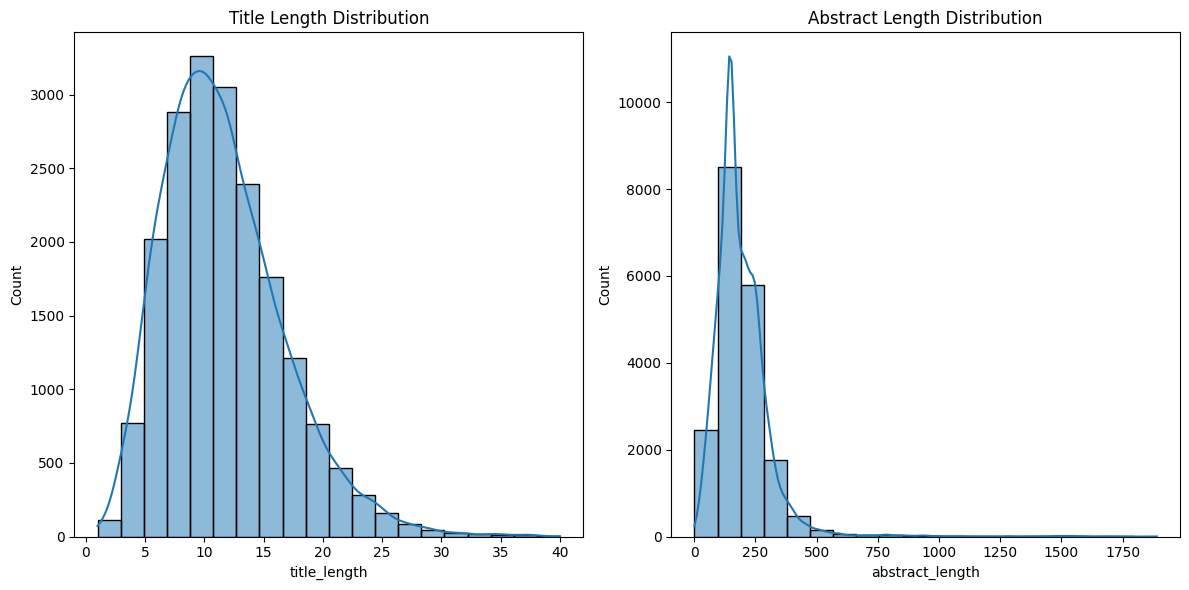

In [36]:
# Text Analysis (Title and Abstract Lengths)
data['title_length'] = data['title'].apply(lambda x: len(str(x).split()))
data['abstract_length'] = data['abstract'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='title_length', bins=20, kde=True)
plt.title('Title Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='abstract_length', bins=20, kde=True)
plt.title('Abstract Length Distribution')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sa3id\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


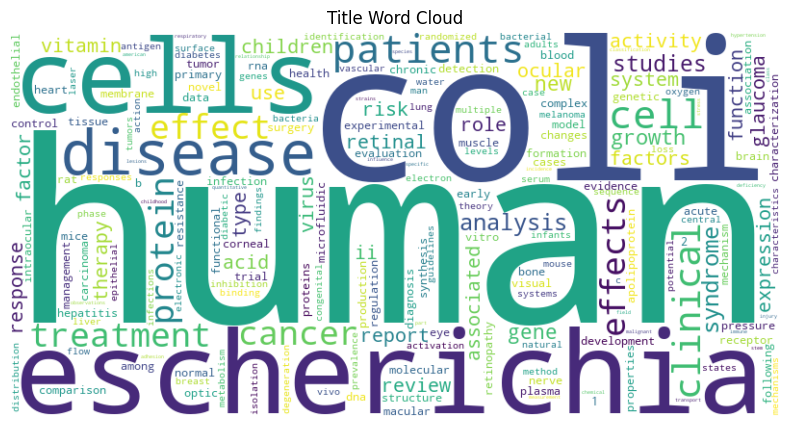

In [37]:
# Word Frequency Analysis (Title and Abstract)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Add custom stopwords
############################################################### to add or remove it later
custom_stopwords = {"two", "one", "results", "e", "study","also","found","used","p","results","group","using","n"}
stop_words.update(custom_stopwords)
###############################################################
# Function to preprocess and tokenize text
def preprocess_and_tokenize(text):
    words = nltk.word_tokenize(str(text).lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

# Tokenize title and abstract
data['title_tokens'] = data['title'].apply(preprocess_and_tokenize)
data['abstract_tokens'] = data['abstract'].apply(preprocess_and_tokenize)

# Title Word Frequency Analysis
title_words = [word for sublist in data['title_tokens'] for word in sublist]
title_word_freq = Counter(title_words)
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Title Word Cloud')
plt.show()

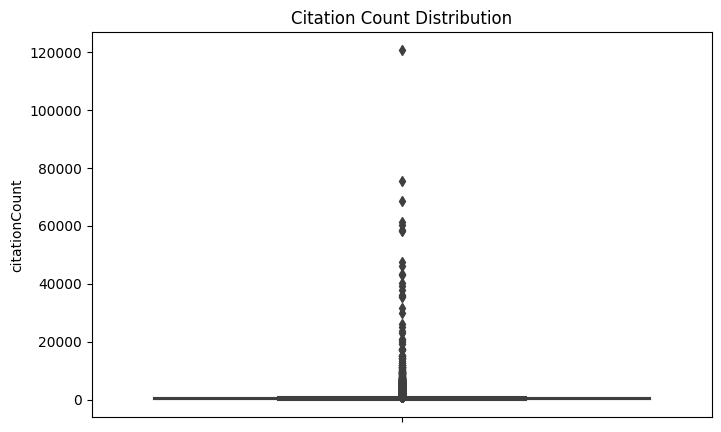

In [38]:
# Citation Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='citationCount')
plt.title('Citation Count Distribution')
plt.show()

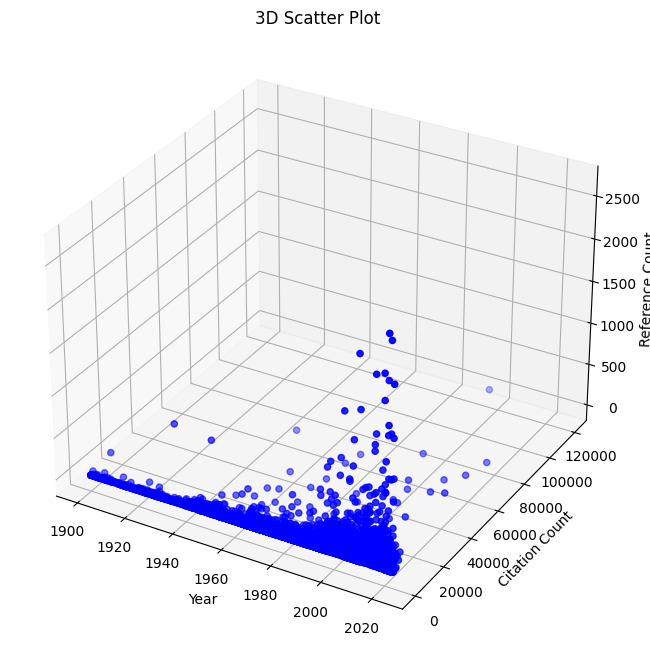

In [39]:
# 3D scatter plot of year, citationCount, and another numeric variable 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['year'], data['citationCount'], data['referenceCount'], c='blue', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Citation Count')
ax.set_zlabel('Reference Count')

plt.title('3D Scatter Plot')
plt.show()
# random data for demonstration
np.random.seed(42)
x = np.random.rand(1000)
y = np.random.rand(1000)
z = np.random.rand(1000)

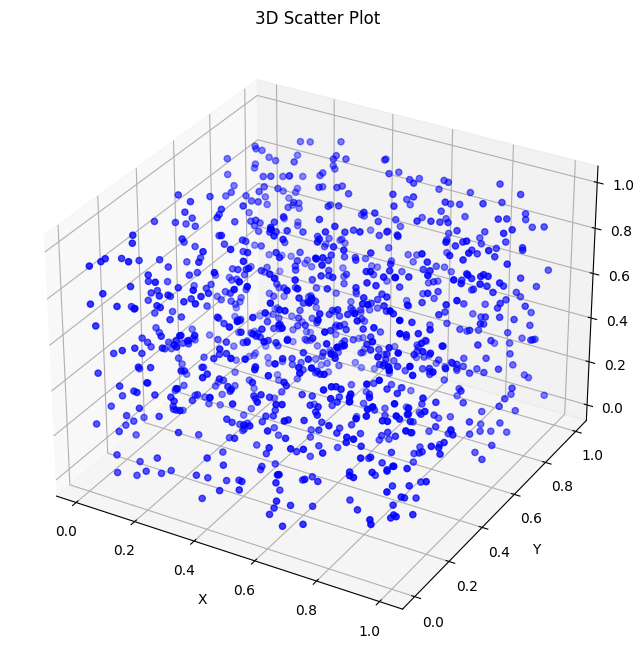

In [40]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# title
ax.set_title('3D Scatter Plot')

plt.show()

In [41]:
# random seed for reproducibility
np.random.seed(0)
n_points = 100
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

# DataFrame
df = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

# Assign a color based on the Z values
color_column = df['Z']

# 3D scatter plot with a colormap
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=color_column, title='3D Scatter Plot')
fig.show()